<a href="https://colab.research.google.com/github/imhyunho99/2023-1--Deaplearning_Framework/blob/main/MNIS_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torchvision
from torchvision import transforms, datasets
%matplotlib inline


In [8]:
if torch.cuda.is_available(): #GPU사용 가능?
  DEVICE = torch.device('cuda:0')
else:
  DEVICE = torch.deviece('cpu')

print(DEVICE)

cuda:0


In [9]:
train_dataset = datasets.MNIST(
  root ="../data/MNIST", #저장 공간
  train = True, #학습 데이터 가져옴
  download = True,
  transform = transforms.ToTensor() #텐서로 형변환
)

test_dataset = datasets.MNIST(
  root ="../data/MNIST", #저장 공간
  train = False, #테스트 데이터 가져옴
  download = True,
  transform = transforms.ToTensor() #텐서로 형변환
)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [13]:
#데이터가 너무 많을때는 반복문으로 돌리기 힘들다. 이때 일부를 때려 넣어주는 data loader를 사용한다
BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset, #사용할 데이터 
    batch_size = BATCH_SIZE, #한번에 넣을 양
    shuffle = True #데이터를 섞을 것인가?
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset, #사용할 데이터 
    batch_size = BATCH_SIZE, #한번에 넣을 양
    shuffle = False #데이터를 섞을 것인가?
)

In [17]:
images, labels = next(iter(train_loader))
print("image size: ",images.size(), "type: ",images.type()) #개수, 색상, 가로세로 픽셀
print("labels size: ",labels.size(), "type: ",labels.type())

image size:  torch.Size([32, 1, 28, 28]) type:  torch.FloatTensor
labels size:  torch.Size([32]) type:  torch.LongTensor


Text(0.5, 1.0, '4')

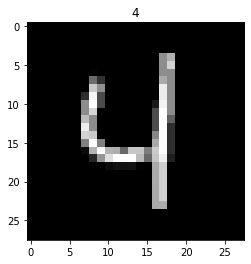

In [18]:
img = np.squeeze(images[7].numpy()) #imshow 로 시각화 하기 위해 np배열로 바꿔준다

plt.imshow(img, cmap = "gray")
plt.title(str(labels[7].item()))

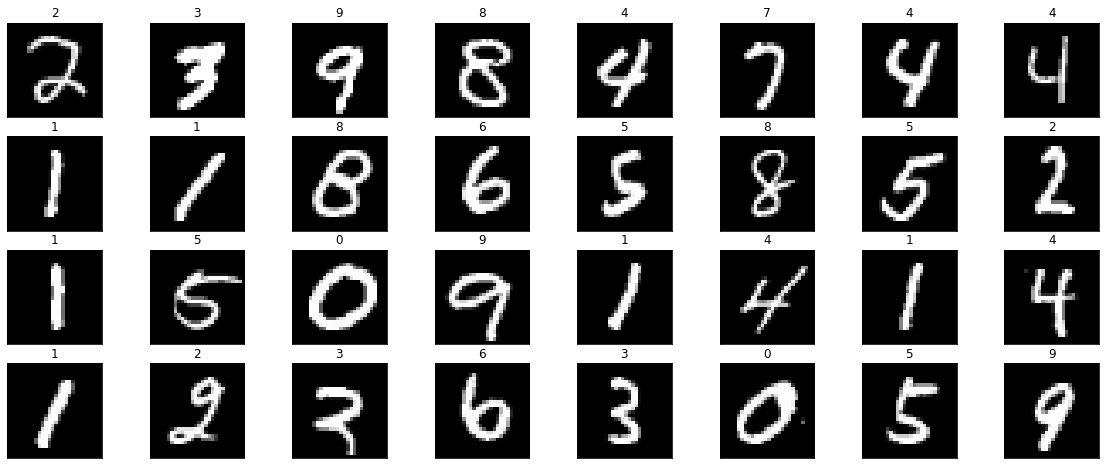

In [20]:
fig = plt.figure(figsize = (20,8))
for idx in np.arange(BATCH_SIZE):
  ax = fig.add_subplot(4, int(BATCH_SIZE/4), idx+1, xticks=[], yticks=[]) #x,y ticks 그래프 눈금은 안그릴거임임
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
  ax.set_title(str(labels[idx].item()))

In [23]:
def imshow(img):
  npimg = img.numpy()
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))#전치시켜서 imshow에 넣는다
  plt.show()

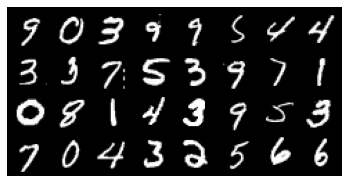

In [24]:
images, labels = next(iter(train_loader))
imshow(torchvision.utils.make_grid(images))

In [27]:
npimg = torchvision.utils.make_grid(images).numpy()
npimg.shape #==> imshow는 세로, 가로, 채널 순서로 필요하다.

(3, 122, 242)

In [29]:
class MLP(nn.Module): #model structure
  def __init__(self):
    super(MLP,self).__init__()
    self.fc1 = nn.Linear(28 *28, 512)# 512개의 노드에 28*28짜리 행렬을 벡터화 해서 넘겨줌
    self.fc2 = nn.Linear(512, 256) #512 ==> 256
    self.fc3 = nn.Linear(256, 10) #256 ==> 10 

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.cf1(x)
    x = F.relu(x)
    x = self.cf2(x)
    x = F.relu(x)
    x = self.cf3(x)
    x = F.relu(x)
    x = F.log_softmax(x,dim=1)
    return x

#dataset==>loader==>module(==model)

In [32]:
def weight_init(m):
  if isinstance(m, nn.Linear):
    init.xavier_uniform_(m.weight.data)

model = MLP().to(DEVICE) #MLP의 생성과 DEVICE로의 이동
model.apply(weight_init) #MODEL의 요소를 가중치 활성함수에 대입

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [37]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

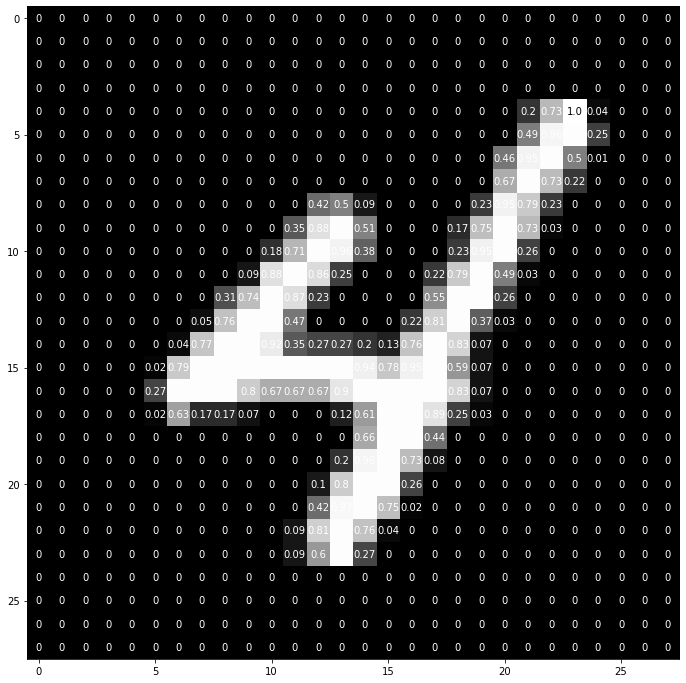

In [42]:
idx = 7
img = np.squeeze(images[idx].numpy())

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')
width, height = img.shape
thresh = img.max()
for x in range(width):
  for  y in range(height):
    val = round(img[x][y],2) if img[x][y] !=0 else 0
    ax.annotate(str(val), xy =(y,x),
      horizontalalignment='center',
      verticalalignment = 'center',
      color = 'white' if img[x][y]<thresh else 'black')